In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [86]:
mainpath = r"C:\Users\ddela\GitHub\Gabriel-Udemy\python-ml-course\datasets"
filepath = r"\ecom-expense\Ecom Expense.csv"

data = pd.read_csv(mainpath+filepath)

In [87]:
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [102]:
dummy_gender = pd.get_dummies(data["Gender"], prefix = "Gender")
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [107]:
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix = "City")
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [111]:
column_names = data.columns.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [112]:
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.tolist()
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [122]:
data_new = data_new[column_names].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [127]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 
                'City_Tier 1', 'City_Tier 2', 'City_Tier 3','Record']

In [128]:
X = data_new[feature_cols]
Y = data_new['Total Spend']

In [129]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303014
[  1.47538980e-01   1.54946125e-01  -1.31025013e+02   1.31025013e+02
   7.67643260e+01   5.51389743e+01  -1.31903300e+02   7.72233446e+02]


In [131]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.764326010495125),
 ('City_Tier 2', 55.138974309232502),
 ('City_Tier 3', -131.90330031972769),
 ('Record', 772.23344574456451)]

In [132]:
lm.score(X,Y)

0.91799235861310158

In [37]:
data_new["prediction"] = lm.predict(pd.DataFrame(data_new[feature_cols]))

In [38]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4877.623695
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,6275.498930
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,7336.067208
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,6566.330344
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,5803.653400


In [49]:
SSD = np.sum((data_new['prediction'] - data_new['Total Spend'])**2)
SSD

14902218469.697126

In [58]:
RSE = np.sqrt(SSD/(len(data_new)-len(feature_cols)-1))
RSE

2516.067185566445

In [54]:
sales_mean = np.mean(data_new['Total Spend'])
sales_mean

6163.176415976714

In [56]:
error = RSE/sales_mean
error

0.40754976003186061

In [59]:
error * 100

40.754976003186059

## Eliminar variables dummy redundantes

In [64]:
dummy_gender = pd.get_dummies(data_new['Gender'], prefix = 'Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [66]:
dummy_city_tier = pd.get_dummies(data_new['City Tier'], prefix = 'City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [73]:
column_names = data.columns.tolist()
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.tolist()
data_new = data_new[column_names].join(dummy_city_tier)

In [74]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [80]:
feature_columns = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = data_new[feature_columns]
Y = data_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print(lm.intercept_)

-133.677817546


In [83]:
list(zip(feature_columns, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.05002651109481),
 ('City_Tier 2', -21.625351701262758),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [84]:
lm.score(X,Y)

0.91799235861310158

## Transformación de variables para conseguir una relación no lineales

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [16]:
mainpath = r"C:\Users\ddela\GitHub\Gabriel-Udemy\python-ml-course\datasets"
filepath = r"\auto\auto-mpg.csv"

data_auto = pd.read_csv(mainpath+filepath)

In [17]:
data_auto.shape

(406, 9)

Text(0.5,1,'CV vs MPG')

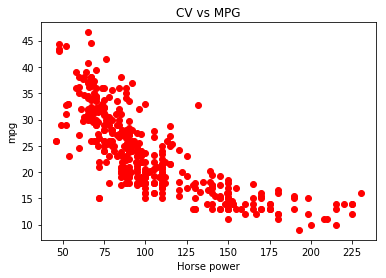

In [8]:
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'] , 'ro')
plt.xlabel('Horse power')
plt.ylabel('mpg')
plt.title('CV vs MPG')

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [27]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = X[:, np.newaxis]

In [28]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

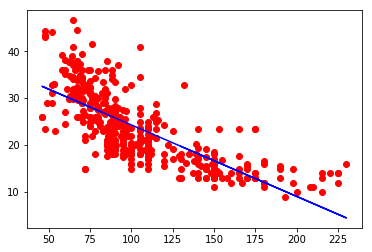

In [39]:
plt.plot(X,Y,'ro')
plt.plot(X, lm.predict(X_data), color="blue")

In [40]:
lm.score(X_data,Y)

0.57465334064502505

In [55]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean =  np.mean(Y)
error = RSE/y_mean
SSD, RSE, error*100

(10315.751960060923, 5.0468794808255115, 21.46277336163346)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [57]:
X = X**2
X_data = X[:, np.newaxis]

In [58]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lm.score(X_data, Y)

0.48498870348232048

In [60]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean =  np.mean(Y)
error = RSE/y_mean
SSD, RSE, error*100

(12490.35034050193, 5.5534107727698192, 23.616889852998106)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [72]:
poly = PolynomialFeatures(degree=2)
X_data = poly.fit_transform(X[:, np.newaxis])

In [73]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
lm.score(X_data, Y)

0.61488782498282224

In [76]:
lm.intercept_

36.101549643342835

In [77]:
lm.coef_

array([  0.00000000e+00,  -1.42176401e-03,   2.06560352e-08])